# EDA: When to use ensemble methods?

We would like to answer the following questions:
* When to use ensemble methods?
* Do harder datasets benefit more from ensemble methods?
* Which datasets obtain better accuracy with ensemble rather than single classifiers?
* etc

In [45]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import pyplot
import seaborn as sns
from sklearn import tree
from sklearn.tree import export_text


In [46]:

os.chdir("..")
root_path = os.getcwd()


In [47]:

path_csv = os.chdir(root_path+'/Results_general_algorithm')
df_complexity = pd.read_csv('complex_info_total.csv')
path_csv = os.chdir(root_path+'/Classification_SingleLearner')
df_classif = pd.read_csv('ClassificationSingleLearner_AllDatasets.csv')
df_bagg = pd.read_csv('best_n_trees_df.csv')
df_bagg.drop(['best_n_ensemble'], axis=1, inplace=True)
df_bagg.columns = ['name_data','acc_bagging']



# We keep only the 9 selected complexity measures: Hostility, kDN, DCP, TD_U, CLD, N1, N2, LSC, F1
df_complexity.drop(['DS','TD_P','MV','CB','LSradius','H','U',
                    'F2','F3','F4'], axis=1, inplace=True)

# Join of two tables
df = pd.merge(df_complexity, df_classif, left_on='Dataset', right_on='dataset', how='left').drop('dataset', axis=1)
df = pd.merge(df, df_bagg, left_on='Dataset', right_on='name_data', how='left').drop('name_data', axis=1)


### Creation of dummy variable to indicate which method obtains higher accuracy (Bagging or Single Classifier)
df['max_acc_single_class'] = df[['acc_svmlinear', 'acc_svmrbf', 'acc_mlp', 'acc_knn', 'acc_dt',
       'acc_nb']].values.max(axis=1)
df['bagging_wins'] = 0
df.loc[(df['acc_bagging'] > df['max_acc_single_class']),'bagging_wins'] = 1
df['max_acc'] = df[['max_acc_single_class', 'acc_bagging']].values.max(axis=1)
df['diff_acc_bagg_with_single'] = df['acc_bagging'] - df['max_acc_single_class']


### Summary accuracy

In [48]:

## Summary accuracy
df.groupby(['bagging_wins']).agg({'max_acc': [np.size,np.mean, np.median, np.std]})


max_acc                              
                size      mean    median       std
bagging_wins                                      
0                 26  0.832289  0.778442  0.124153
1                 21  0.839682  0.820655  0.092410

In [49]:

summ_complexity = df.groupby(['bagging_wins']).agg({'Hostility': [np.mean, np.median, np.std],
                                  'kDN': [np.mean, np.median, np.std],
                                  'DCP': [np.mean, np.median, np.std],
                                  'TD_U': [np.mean, np.median, np.std],
                                  'CLD': [np.mean, np.median, np.std],
                                  'N1': [np.mean, np.median, np.std],
                                  'N2': [np.mean, np.median, np.std],
                                  'LSC': [np.mean, np.median, np.std],
                                  'F1': [np.mean, np.median, np.std]})
print('----------Hostility----------')
print(summ_complexity['Hostility'])
print('----------kDN----------')
print(summ_complexity['kDN'])
print('----------DCP----------')
print(summ_complexity['DCP'])
print('----------TD_U----------')
print(summ_complexity['TD_U'])
print('----------CLD----------')
print(summ_complexity['CLD'])
print('----------N1----------')
print(summ_complexity['N1'])
print('----------N2----------')
print(summ_complexity['N2'])
print('----------LSC----------')
print(summ_complexity['LSC'])
print('----------F1----------')
print(summ_complexity['F1'])

----------Hostility----------
                  mean    median       std
bagging_wins                              
0             0.208854  0.216225  0.136602
1             0.198364  0.209016  0.097023
----------kDN----------
                  mean    median       std
bagging_wins                              
0             0.273163  0.315627  0.159581
1             0.254885  0.260851  0.124067
----------DCP----------
                  mean    median       std
bagging_wins                              
0             0.218910  0.229819  0.158997
1             0.232948  0.200370  0.146719
----------TD_U----------
                  mean    median       std
bagging_wins                              
0             0.588568  0.556622  0.149691
1             0.558963  0.552732  0.091151
----------CLD----------
                  mean    median       std
bagging_wins                              
0             0.298792  0.334022  0.146431
1             0.361220  0.363328  0.099963
----------N1-

### Graphs

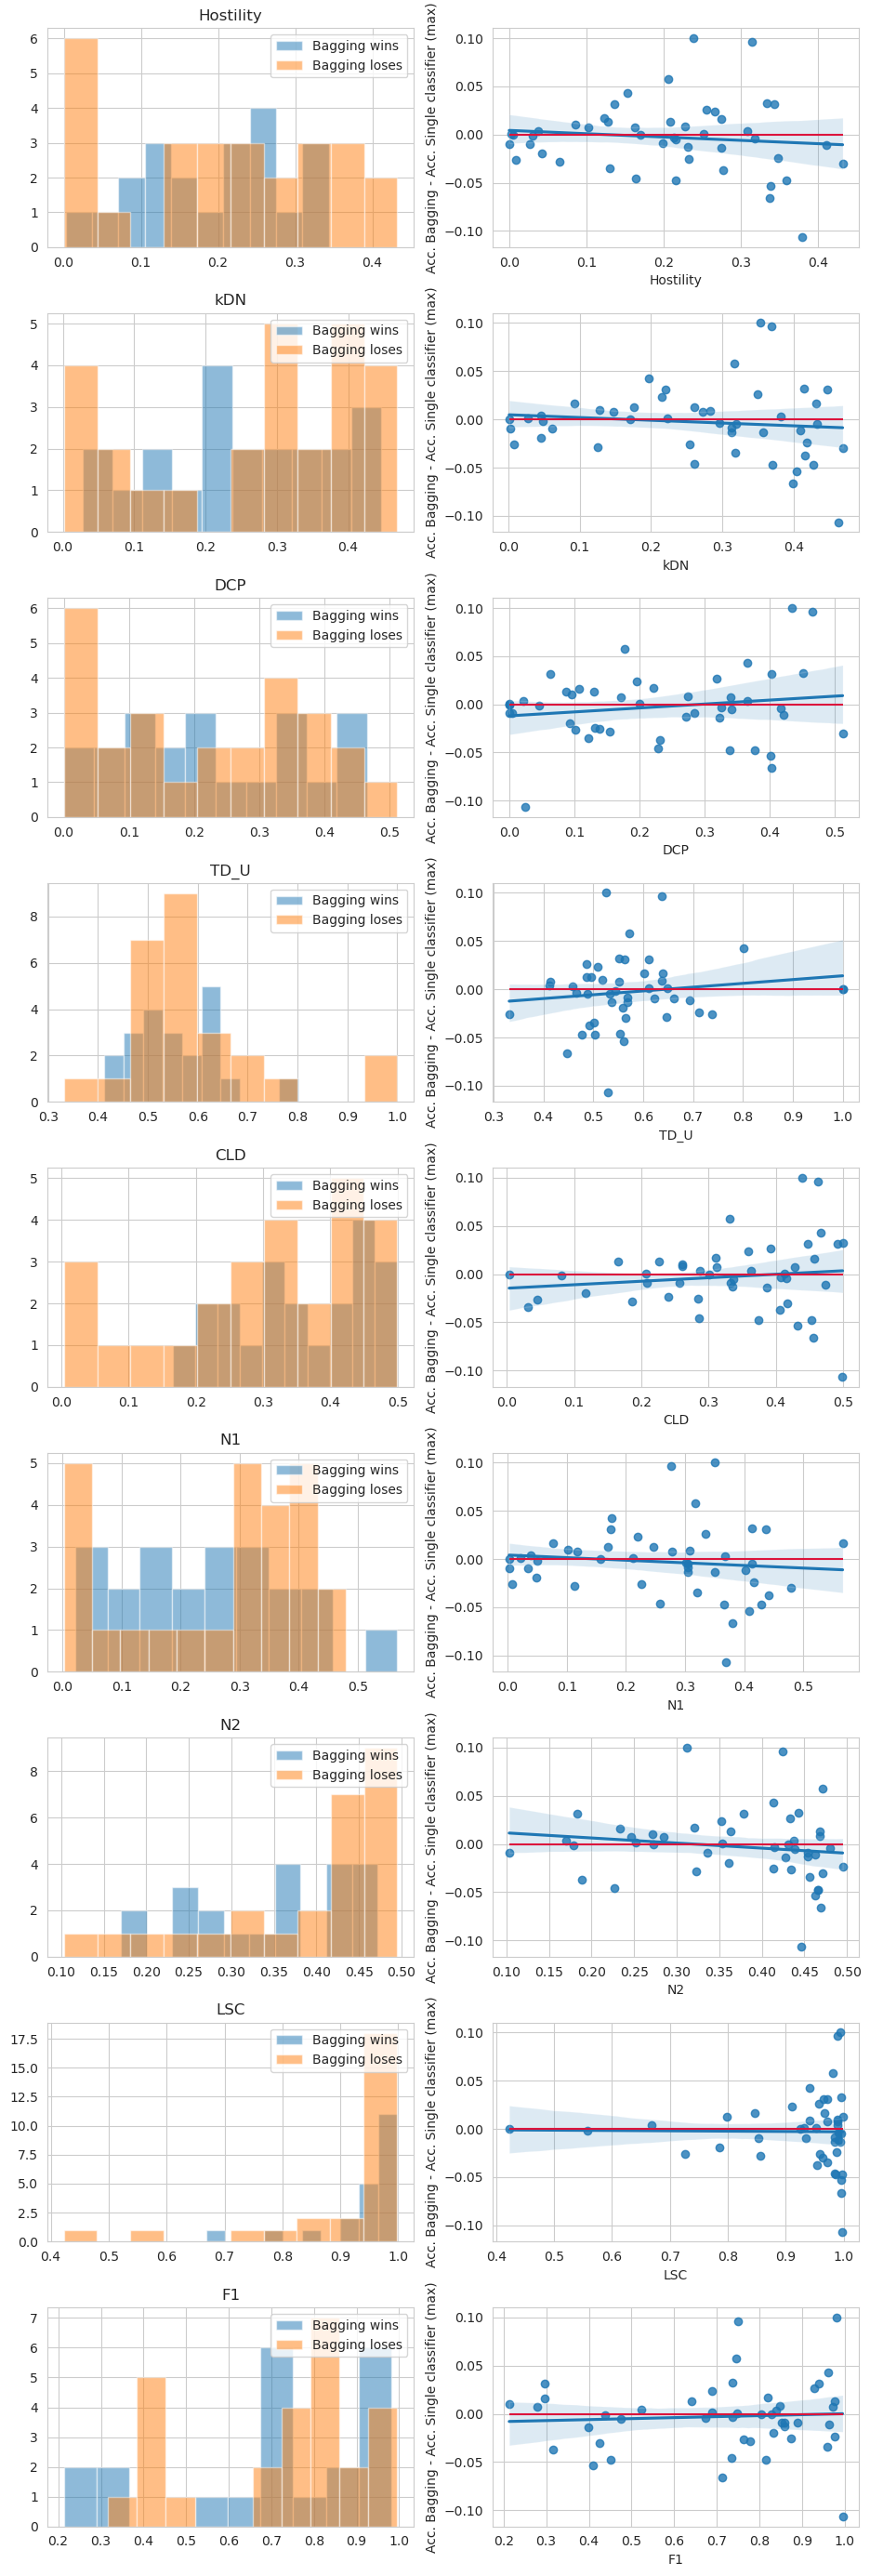

In [50]:
fig, axes = plt.subplots(9, 2, figsize=(10, 28))
fig.tight_layout(pad=3.0)
# Hostility
axes[0, 0].hist(df.loc[df['bagging_wins']==1,'Hostility'], alpha=0.5, label='Bagging wins')
axes[0, 0].hist(df.loc[df['bagging_wins']==0,'Hostility'], alpha=0.5, label='Bagging loses')
axes[0, 0].legend(loc='upper right')
axes[0, 0].set_title('Hostility')

sns.regplot(x=df['Hostility'],y=df['diff_acc_bagg_with_single'], ax=axes[0, 1]).set(title='', xlabel = 'Hostility', ylabel = 'Acc. Bagging - Acc. Single classifier (max)')
axes[0, 1].hlines(y=0,xmin=min(df['Hostility']),xmax=max(df['Hostility']), colors = 'crimson')

# kDN
axes[1, 0].hist(df.loc[df['bagging_wins']==1,'kDN'], alpha=0.5, label='Bagging wins')
axes[1, 0].hist(df.loc[df['bagging_wins']==0,'kDN'], alpha=0.5, label='Bagging loses')
axes[1, 0].legend(loc='upper right')
axes[1, 0].set_title('kDN')

sns.regplot(x=df['kDN'],y=df['diff_acc_bagg_with_single'], ax=axes[1, 1]).set(title='', xlabel = 'kDN', ylabel = 'Acc. Bagging - Acc. Single classifier (max)')
axes[1, 1].hlines(y=0,xmin=min(df['kDN']),xmax=max(df['kDN']), colors = 'crimson')

# DCP
axes[2, 0].hist(df.loc[df['bagging_wins']==1,'DCP'], alpha=0.5, label='Bagging wins')
axes[2, 0].hist(df.loc[df['bagging_wins']==0,'DCP'], alpha=0.5, label='Bagging loses')
axes[2, 0].legend(loc='upper right')
axes[2, 0].set_title('DCP')

sns.regplot(x=df['DCP'],y=df['diff_acc_bagg_with_single'], ax=axes[2, 1]).set(title='', xlabel = 'DCP', ylabel = 'Acc. Bagging - Acc. Single classifier (max)')
axes[2, 1].hlines(y=0,xmin=min(df['DCP']),xmax=max(df['DCP']), colors = 'crimson')

# TD_U
axes[3, 0].hist(df.loc[df['bagging_wins']==1,'TD_U'], alpha=0.5, label='Bagging wins')
axes[3, 0].hist(df.loc[df['bagging_wins']==0,'TD_U'], alpha=0.5, label='Bagging loses')
axes[3, 0].legend(loc='upper right')
axes[3, 0].set_title('TD_U')

sns.regplot(x=df['TD_U'],y=df['diff_acc_bagg_with_single'], ax=axes[3, 1]).set(title='', xlabel = 'TD_U', ylabel = 'Acc. Bagging - Acc. Single classifier (max)')
axes[3, 1].hlines(y=0,xmin=min(df['TD_U']),xmax=max(df['TD_U']), colors = 'crimson')

# CLD
axes[4, 0].hist(df.loc[df['bagging_wins']==1,'CLD'], alpha=0.5, label='Bagging wins')
axes[4, 0].hist(df.loc[df['bagging_wins']==0,'CLD'], alpha=0.5, label='Bagging loses')
axes[4, 0].legend(loc='upper right')
axes[4, 0].set_title('CLD')

sns.regplot(x=df['CLD'],y=df['diff_acc_bagg_with_single'], ax=axes[4, 1]).set(title='', xlabel = 'CLD', ylabel = 'Acc. Bagging - Acc. Single classifier (max)')
axes[4, 1].hlines(y=0,xmin=min(df['CLD']),xmax=max(df['CLD']), colors = 'crimson')

# N1
axes[5, 0].hist(df.loc[df['bagging_wins']==1,'N1'], alpha=0.5, label='Bagging wins')
axes[5, 0].hist(df.loc[df['bagging_wins']==0,'N1'], alpha=0.5, label='Bagging loses')
axes[5, 0].legend(loc='upper right')
axes[5, 0].set_title('N1')

sns.regplot(x=df['N1'],y=df['diff_acc_bagg_with_single'], ax=axes[5, 1]).set(title='', xlabel = 'N1', ylabel = 'Acc. Bagging - Acc. Single classifier (max)')
axes[5, 1].hlines(y=0,xmin=min(df['N1']),xmax=max(df['N1']), colors = 'crimson')

# N2
axes[6, 0].hist(df.loc[df['bagging_wins']==1,'N2'], alpha=0.5, label='Bagging wins')
axes[6, 0].hist(df.loc[df['bagging_wins']==0,'N2'], alpha=0.5, label='Bagging loses')
axes[6, 0].legend(loc='upper right')
axes[6, 0].set_title('N2')

sns.regplot(x=df['N2'],y=df['diff_acc_bagg_with_single'], ax=axes[6, 1]).set(title='', xlabel = 'N2', ylabel = 'Acc. Bagging - Acc. Single classifier (max)')
axes[6, 1].hlines(y=0,xmin=min(df['N2']),xmax=max(df['N2']), colors = 'crimson')

# LSC
axes[7, 0].hist(df.loc[df['bagging_wins']==1,'LSC'], alpha=0.5, label='Bagging wins')
axes[7, 0].hist(df.loc[df['bagging_wins']==0,'LSC'], alpha=0.5, label='Bagging loses')
axes[7, 0].legend(loc='upper right')
axes[7, 0].set_title('LSC')

sns.regplot(x=df['LSC'],y=df['diff_acc_bagg_with_single'], ax=axes[7, 1]).set(title='', xlabel = 'LSC', ylabel = 'Acc. Bagging - Acc. Single classifier (max)')
axes[7, 1].hlines(y=0,xmin=min(df['LSC']),xmax=max(df['LSC']), colors = 'crimson')

# F1
axes[8, 0].hist(df.loc[df['bagging_wins']==1,'F1'], alpha=0.5, label='Bagging wins')
axes[8, 0].hist(df.loc[df['bagging_wins']==0,'F1'], alpha=0.5, label='Bagging loses')
axes[8, 0].legend(loc='upper right')
axes[8, 0].set_title('F1')

sns.regplot(x=df['F1'],y=df['diff_acc_bagg_with_single'], ax=axes[8, 1]).set(title='', xlabel = 'F1', ylabel = 'Acc. Bagging - Acc. Single classifier (max)')
axes[8, 1].hlines(y=0,xmin=min(df['F1']),xmax=max(df['F1']), colors = 'crimson')


plt.show()

## Decision tree (explicability)

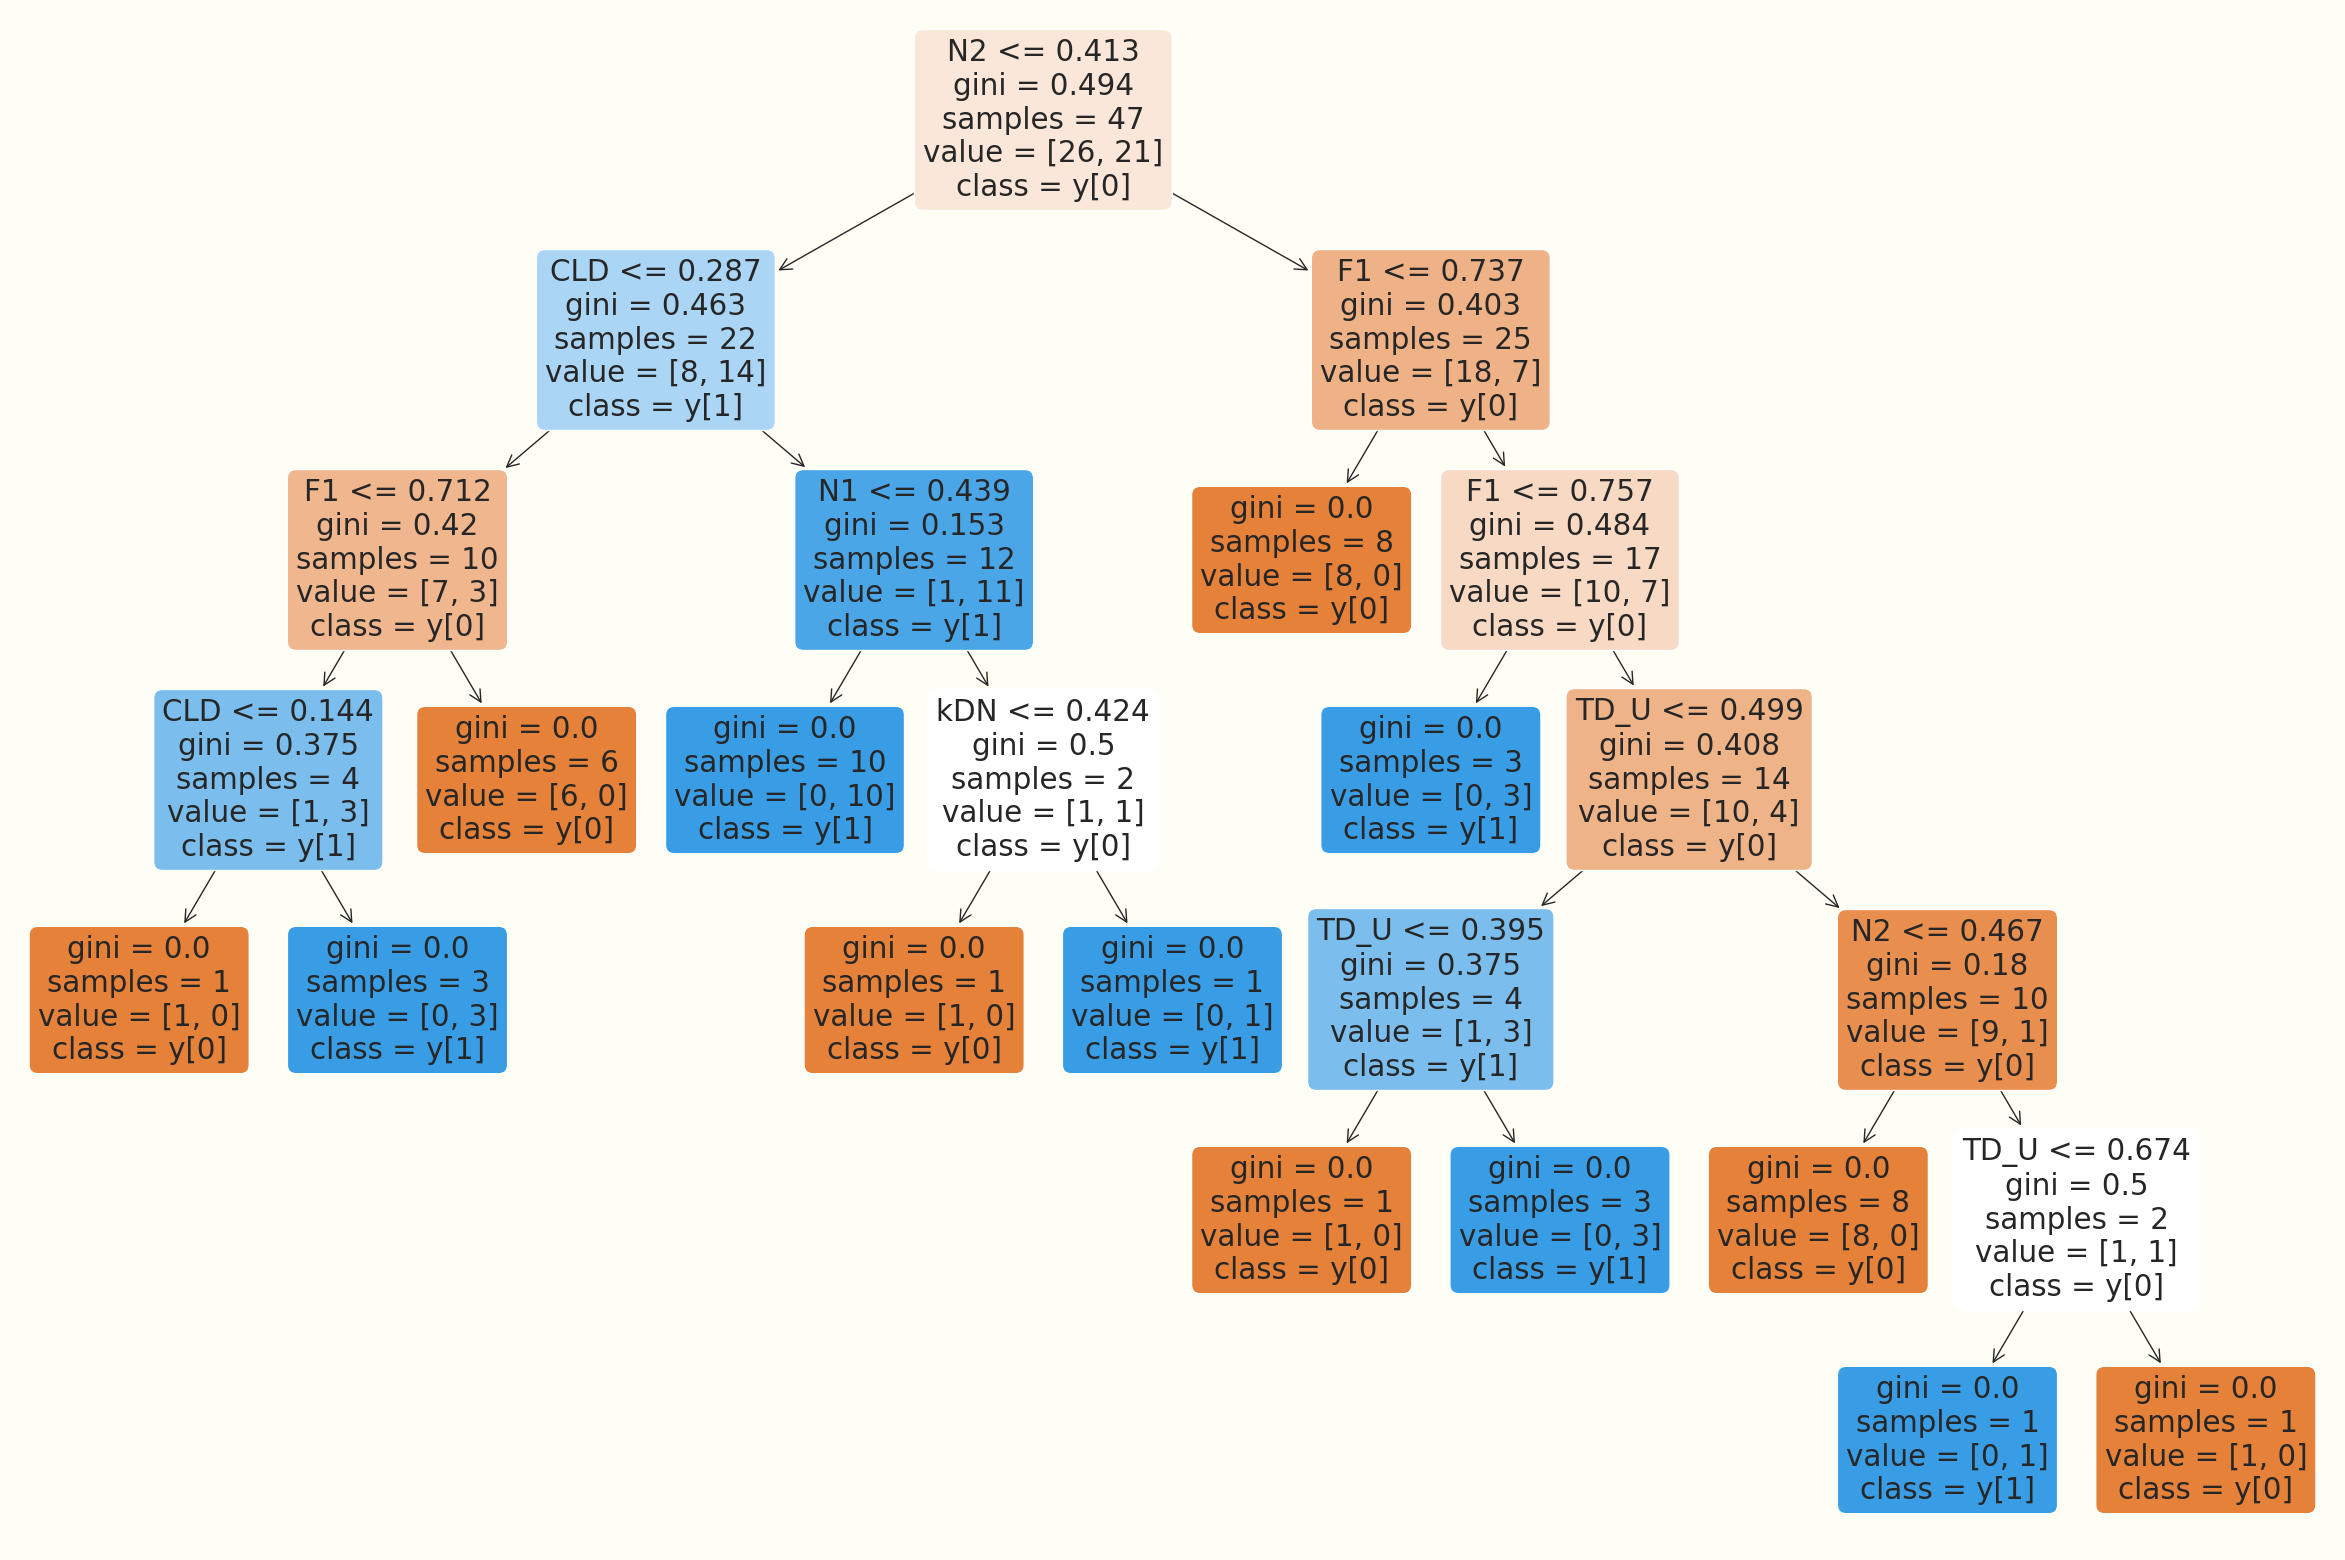

In [59]:
X = df[['Hostility', 'kDN', 'DCP', 'TD_U', 'CLD', 'N1', 'N2', 'LSC','F1']]
Y = df['bagging_wins']
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)


CM_names = X.columns

plt.figure(figsize=(30,20), facecolor ='#FFFEF5')
tree.plot_tree(clf,
               rounded=True,
               filled = True,
               feature_names = CM_names,
               class_names=True)
plt.show()

In [52]:
tree_rules = export_text(clf,feature_names = list(CM_names))
print(tree_rules)


|--- N2 <= 0.41
|   |--- CLD <= 0.29
|   |   |--- F1 <= 0.71
|   |   |   |--- CLD <= 0.14
|   |   |   |   |--- class: 0
|   |   |   |--- CLD >  0.14
|   |   |   |   |--- class: 1
|   |   |--- F1 >  0.71
|   |   |   |--- class: 0
|   |--- CLD >  0.29
|   |   |--- Hostility <= 0.28
|   |   |   |--- class: 1
|   |   |--- Hostility >  0.28
|   |   |   |--- TD_U <= 0.53
|   |   |   |   |--- class: 0
|   |   |   |--- TD_U >  0.53
|   |   |   |   |--- class: 1
|--- N2 >  0.41
|   |--- F1 <= 0.74
|   |   |--- class: 0
|   |--- F1 >  0.74
|   |   |--- F1 <= 0.76
|   |   |   |--- class: 1
|   |   |--- F1 >  0.76
|   |   |   |--- TD_U <= 0.50
|   |   |   |   |--- N2 <= 0.42
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- N2 >  0.42
|   |   |   |   |   |--- class: 1
|   |   |   |--- TD_U >  0.50
|   |   |   |   |--- N2 <= 0.47
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- N2 >  0.47
|   |   |   |   |   |--- N2 <= 0.48
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- N